# unsupervised learning - Using Elbow method

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
path =r"C:\Users\USER\Documents\A data science\MachineLearning\Mall_Customers.csv"
data = pd.read_csv(path)
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [32]:
# data preparation - removing unwanted cols and convert data into numerical data
df = data.drop(['CustomerID'],axis=1)
df["Gender"]=df["Gender"].str.lower()
df["Gender"] = np.where(df["Gender"]=="male",1,0)
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81


In [33]:
# feature scaling to age, income,spending
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[["Age","Annual Income (k$)","Spending Score (1-100)"]] = ss.fit_transform(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704


## Using Elbow method to find the no of clusters

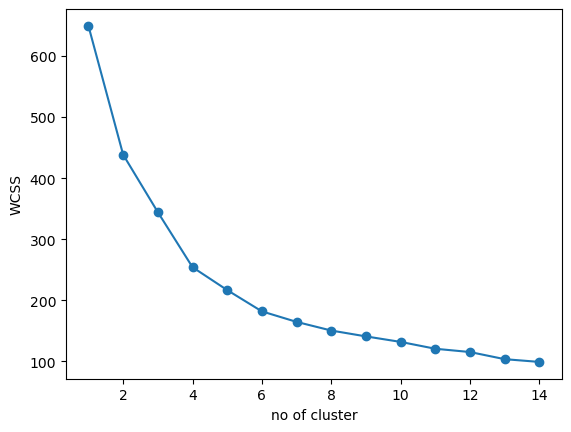

In [34]:
import warnings
warnings.filterwarnings("ignore")

# model call and train
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,15):
    km = KMeans(n_clusters = i)
    km.fit(df)
    wcss.append(km.inertia_)
    
# ploting it
plt.plot(range(1,15), wcss, marker = 'o')
plt.xlabel("no of cluster")
plt.ylabel("WCSS")
plt.show()

## Best number of clusters = 6 , as here at 6 the wcss does not show random difference 

In [35]:
best_km = KMeans(n_clusters=6)
best_km.fit(df)
label = best_km.labels_
label

array([4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 0, 1,
       0, 4, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3, 5, 3, 5, 3, 5, 3,
       1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3])

In [36]:
data["predicted_label_clustering"] = label
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_label_clustering
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
